# Computer-Aided Musicology
## From Pythagoras to the Diatonic Scale
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


# Imports

In [1]:
#Imports 
from music21 import *
from IPython.display import Image
import sympy as sp


# Auxiliary Function to Display Musical Score
def get_score_png():
    filename = ! ls *.png -Art | tail -n 1
    return(filename[0])

## String Vibration

In [2]:
from sympy import init_printing
init_printing()
from sympy.abc import mu
from sympy import symbols, sqrt

In [3]:
f, f1, f2, L, L1, L2,T,mu = symbols('f f1 f2 L L1 L2 T mu')

In [4]:
Eq=sp.Eq(f,((1/(2*L))*sqrt(T/mu)))
Eq

In [5]:
Eq1=sp.Eq(f1,((1/(2*L1))*sqrt(T/mu)))
Eq2=sp.Eq(f2,((1/(2*L2))*sqrt(T/mu)))
Eq1, Eq2

{{Eq}}
{{mu}}

In [6]:
Eq3=sp.Eq(Eq1.lhs/Eq2.lhs,Eq1.rhs/Eq2.rhs)
Eq3


In [7]:
Eq4=sp.Eq(f1,sp.solve(Eq3,f1)[0])
Eq4

In [8]:
from librosa import hz_to_note, note_to_hz
D3_freq=note_to_hz('D3')
print(D3_freq)

146.8323839587038


In [9]:
new_freq=Eq4.subs({L2:2,L1:1,f2:D3_freq })
new_note=hz_to_note(float(new_freq.rhs))
print(new_note)

D4


In [10]:
Eq4

In [133]:
new_freq=Eq4.subs({L2:3,L1:2,f2:D3_freq })
new_note=hz_to_note(float(new_freq.rhs))
print(new_note)

A3


In [155]:
D3=pitch.Pitch('D3')

def test_scale(pitch1):
    pitch2=pitch1.transpose(12)
    pitches_list=[pitch1]
    i = interval.Interval('p5')
    new_pitch_forward=pitch1
    new_pitch_backward=pitch1
    for j in range(6):
        #Forward
        new_pitch_forward=i.transposePitch(new_pitch_forward)
        if new_pitch_forward.frequency  > pitch2.frequency:
            new_pitch_forward=new_pitch_forward.transpose(-12)
        if new_pitch_forward.frequency  < pitch1.frequency:
            new_pitch_forward=new_pitch_forward.transpose(12)
        pitches_list.append(new_pitch_forward)
        #Backward
        new_pitch_backward=i.reverse().transposePitch(new_pitch_backward)
        if new_pitch_backward.frequency  > pitch2.frequency:
            new_pitch_backward=new_pitch_backward.transpose(-12)
        if new_pitch_backward.frequency  < pitch1.frequency:
            new_pitch_backward=new_pitch_backward.transpose(12)
        pitches_list.append((new_pitch_backward))
        
    return pitches_list
    
    

In [156]:
test=test_scale(D3)

0
1
2
3
4
5


In [157]:
test

[<music21.pitch.Pitch D3>,
 <music21.pitch.Pitch A3>,
 <music21.pitch.Pitch G3>,
 <music21.pitch.Pitch E3>,
 <music21.pitch.Pitch C4>,
 <music21.pitch.Pitch B3>,
 <music21.pitch.Pitch F3>,
 <music21.pitch.Pitch F#3>,
 <music21.pitch.Pitch B-3>,
 <music21.pitch.Pitch C#4>,
 <music21.pitch.Pitch E-3>,
 <music21.pitch.Pitch G#3>,
 <music21.pitch.Pitch G#3>]

### Pitch Properties

In [2]:
p1 = pitch.Pitch('A-4')

In [3]:
# http://web.mit.edu/music21/doc/moduleReference/modulePitch.html#module-music21.pitch
print(p1.fullName)
print(p1.italian)
print(p1.unicodeNameWithOctave)
print("MIDI Number:", p1.midi)
print("Frequency [Hz]:", p1.frequency)

A-flat in octave 4
la bemolle
A♭4
MIDI Number: 68
Frequency [Hz]: 415.3046975799451


### Pitch Transpose

In [4]:
p2 = p1.transpose(1)
print(p2.unicodeNameWithOctave)

A4


In [5]:
p3 = p2.transpose('p5')
print(p3.spanish)
print(p3.unicodeNameWithOctave)

mi
E5


### Pitch Harmonics

In [6]:
# Harmonics
harmonics=[]
for harmonic in [1,2,3,4,5]:
    harmonics.append(p2.getHarmonic(harmonic))
for i in harmonics:
    print(i.unicodeNameWithOctave,':', i.frequency, "-", i)

A4 : 440.0 - A4
A5 : 880.0000000000003 - A5
E6 : 1320.0343105715208 - E6(+2c)
A6 : 1760.000000000002 - A6
C♯7 : 2199.6013780028807 - C#7(-14c)


In [7]:
print(harmonics[2])
print(harmonics[2].fundamental)

E6(+2c)
A4


### Cents in Music

$$ \text{1 cent}  = \text{1 % of a semitone} $$
$$ \text{1 semitone}  = \frac{1}{12} \text{ of an octave} $$
$$ \Rightarrow  \text{1200 cents in an octave} $$
  
$$ n = 1200 \cdot \log _{2} \left( \frac{a}{b} \right) $$
  
Where n is the number of cents, and _'a'_ and _'b'_ are the frequencies of two notes.


In [8]:
p4 = pitch.Pitch('E6')
print("E6 Frequency:",p4.frequency)
p4.microtone = 2
print("E6 + 2 Cents Frequency:", p4.frequency)

print("Frequency of the third harmonic of A4: 440*3=", 440*3)

E6 Frequency: 1318.5102276514808
E6 + 2 Cents Frequency: 1320.0343105715208
Frequency of the third harmonic of A4: 440*3= 1320


### Formula for the frequency of notes of the equal temperament scale
  
  
$$ f_n = f_0 \cdot \left( \sqrt[12]{2} \right)^n $$
$ \text{Where:} $ 
 
$ f_n \text{ is the Frequency of a note n half-steps away. } $
 
$ n \text{ is the number of half-steps away from a fixed note. } $
 
$ f_0 \text{ is a fixed note. For example the standar A=440 Hz. } $

In [9]:
print('E6 Frequency: 440*(2**(1/12))**19 =', 440*(2**(1/12))**19)

E6 Frequency: 440*(2**(1/12))**19 = 1318.5102276514808


### Pitch Enharmonics

In [10]:
# Alternate Musical Speeling
print(p1.getAllCommonEnharmonics())
print(p1.getLowerEnharmonic())
print(p1.getHigherEnharmonic())

[<music21.pitch.Pitch G#4>]
G#4
B---4


## Duration
 
 "Duration is the length of time a pitch, or tone, is sounded." - Benward, B., 2003. Music In Theory and Practice Spiral. Mcgraw-Hill College.

In [11]:
# Music21 Durations are almost always measured in Quarter Notes, so an eighth note has a duration of 0.5. 
# http://web.mit.edu/music21/doc/moduleReference/moduleDuration.html#module-music21.duration

d = duration.Duration()
d.quarterLength = 0.5
print("An %s note, has the duration of 0.5 quarter note." % d.type)

An eighth note, has the duration of 0.5 quarter note.


In [12]:
d.type='whole'
print("A whole note has the duration of %d quarter notes." % d.quarterLength)

A whole note has the duration of 4 quarter notes.


In [13]:
print(d.fullName)

Whole


## Note

In [14]:
n1 = note.Note('A4')
n1.quarterLength = 0.5
print(n1.fullName)
print(n1.pitch)

A in octave 4 Eighth Note
A4


In [15]:
n2=n1.transpose('m3')
print(n2.fullName)

C in octave 5 Eighth Note


In [16]:
r = note.Rest(type='whole')
print(r.fullName)

Whole Rest


## Interval
 
"Intervals, or distances in pitch space between two pitches, are fundamental concepts of music theory, dating back at least to Ancient Greece, and are thus fundamental concepts in music21 as well." - http://web.mit.edu/music21/doc/usersGuide/usersGuide_18_intervals.html

In [17]:
i = interval.Interval('m7')

In [18]:
print(i.niceName)
print(i.semitones)


Minor Seventh
10


In [19]:
n3=i.transposeNote(n1)
print("Orignal Note:", n1.fullName)
print("Transposed Note:", n3.fullName)
n4=i.reverse().transposeNote(n1)
print("Resersed Transposed Note:", n4.fullName)


Orignal Note: A in octave 4 Eighth Note
Transposed Note: G in octave 5 Eighth Note
Resersed Transposed Note: B in octave 3 Eighth Note


## Scale

In [20]:
harmonicMinor = scale.HarmonicMinorScale('C4')

In [21]:
print([str(p) for p in harmonicMinor.pitches])

['C4', 'D4', 'E-4', 'F4', 'G4', 'A-4', 'B4', 'C5']


In [22]:
list_of_notes=[note.Note(p) for p in harmonicMinor.pitches]
list_of_intervals=[interval.notesToInterval(list_of_notes[0],n) for n in list_of_notes]
print("Intervals:", [t.name for t in list_of_intervals])

Intervals: ['P1', 'M2', 'm3', 'P4', 'P5', 'm6', 'M7', 'P8']


In [23]:
harmonicMinor.deriveRanked(['c', 'e-', 'g'])

[(3, <music21.scale.HarmonicMinorScale G harmonic minor>),
 (3, <music21.scale.HarmonicMinorScale E harmonic minor>),
 (3, <music21.scale.HarmonicMinorScale C harmonic minor>),
 (2, <music21.scale.HarmonicMinorScale B- harmonic minor>)]

In [24]:
harmonicMinorBflat = scale.HarmonicMinorScale('B-4')
print([str(p) for p in harmonicMinorBflat.pitches])

['B-4', 'C5', 'D-5', 'E-5', 'F5', 'G-5', 'A5', 'B-5']


In [25]:
harmonicMinorBflat.deriveByDegree(7, 'c')

<music21.scale.HarmonicMinorScale D- harmonic minor>

In [26]:
harmonicMinorDflat = scale.HarmonicMinorScale('D-4')
print([str(p) for p in harmonicMinorDflat.pitches])

['D-4', 'E-4', 'F-4', 'G-4', 'A-4', 'B--4', 'C5', 'D-5']


In [27]:
def minor_pentatonic(pitch_name):
    list_of_intervals=['p1','m3', 'p4', 'p5', 'm7']
    
    return [interval.Interval(interval_symbol).transposePitch(pitch.Pitch(pitch_name)) 
           for interval_symbol in list_of_intervals]

In [28]:
AminorPentatonic= minor_pentatonic('A4')
print([p.nameWithOctave for p in AminorPentatonic])

['A4', 'C5', 'D5', 'E5', 'G5']


In [29]:
majorScale=scale.MajorScale()
majorScale.deriveAll(AminorPentatonic)

[<music21.scale.MajorScale G major>,
 <music21.scale.MajorScale F major>,
 <music21.scale.MajorScale C major>]

## Stream

In [30]:
# Objects stored in a Stream are generally spaced in time; 
# each stored object has an offset usually representing how many quarter notes it lies from the beginning of the Stream. 
#For instance in a 4/4 measure of two half notes, the first note will be at offset 0.0, and the second at offset 2.0.
s = stream.Stream()

In [31]:
sr = note.SpacerRest(type='whole')
s.append(sr)
s.append([note.Note(p) for p in AminorPentatonic])

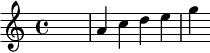

In [32]:
s.show('lily.png')
Image(filename=get_score_png())

In [33]:
s.show('midi')